In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf

from IPython.display import display, HTML
display(HTML(""" <style> .output {display: center; align-items: left; text-align: center; justify-content: center; } </style> """))

In [14]:
#%matplotlib notebook
%matplotlib inline

In [3]:
datos = pd.read_excel('plantas_intermitentes_clean.xlsx', header=1)
datos = datos.reset_index(level=None)
datos = datos.drop(range(0, 24),axis=0)
datos = datos.set_index(datos['fecha_hora'])
datos.head()

,index,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
fecha_hora,,,,,,,,,,,,,,,,,,,,,
2013-11-15 01:00:00,24,25,viernes,2013-11-15,1,420,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-15 01:00:00
2013-11-15 02:00:00,25,26,viernes,2013-11-15,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-15 02:00:00
2013-11-15 03:00:00,26,27,viernes,2013-11-15,3,170,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-15 03:00:00
2013-11-15 04:00:00,27,28,viernes,2013-11-15,4,95,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-15 04:00:00
2013-11-15 05:00:00,28,29,viernes,2013-11-15,5,55,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-15 05:00:00


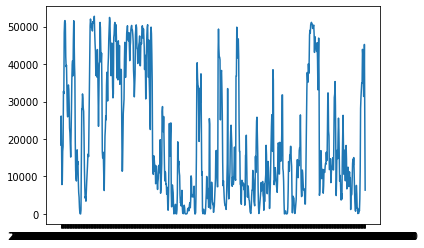

In [15]:
plt.plot(datos.GICIE301[46000:])
plt.show()

In [51]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [138]:
def forecast(x,lag):
    import matplotlib.pyplot as plt
    from statsmodels.tsa.ar_model import AR
    import numpy as np
    ar_model = AR(x)
    ar_res = ar_model.fit(lag)
    prediccion = ar_res.predict(lag,len(x)+1)
    plt.figure(figsize=(14,10),facecolor='salmon')
    plt.plot(np.arange(len(x)),x,label='Datos Historicos',color='royalblue')
    plt.plot(np.arange(len(prediccion))+6,prediccion,label='Predicción',color = 'deeppink')
    plt.grid()
    plt.legend(loc='best',prop={'size': 20})
    #plt.xlim(len(prediccion)-20,len(prediccion))
    plt.title('Datos Historicos con Proyección',fontsize=30,weight='demi')
    #plt.plot(a,b,'X', color = 'gold',ms=30)
    plt.show()
    return prediccion[-6:]

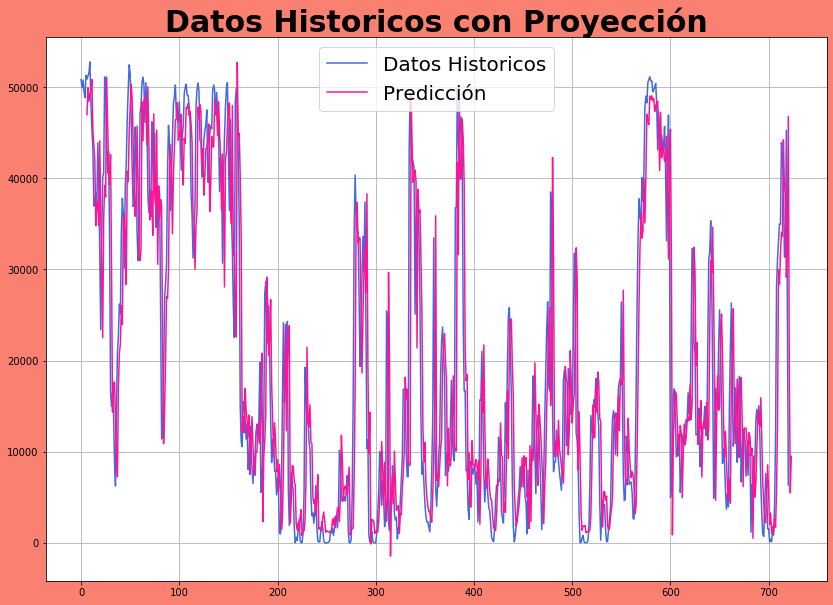

array([29118.9138844 , 31898.02239693, 46791.34859069, 18918.62343824,
        5476.33694392,  9484.61966397])

In [139]:
forecast(Y,5)

In [141]:
pred = [29118.9138844 , 31898.02239693, 46791.34859069, 18918.62343824, 5476.33694392,  9484.61966397]

In [199]:
Y = np.concatenate((Y, pred), axis =0)

In [200]:
Y

array([5.08280000e+04, 4.99340000e+04, 5.07930000e+04, 4.95150000e+04,
       4.88460000e+04, 5.13110000e+04, 5.08960000e+04, 5.12530000e+04,
       5.15680000e+04, 5.27740000e+04, 4.83110000e+04, 4.53760000e+04,
       4.33480000e+04, 3.69450000e+04, 3.73800000e+04, 3.83560000e+04,
       3.65280000e+04, 4.38840000e+04, 3.94720000e+04, 3.19440000e+04,
       2.33930000e+04, 3.29650000e+04, 4.01960000e+04, 4.05640000e+04,
       5.11270000e+04, 4.96990000e+04, 4.40390000e+04, 4.05570000e+04,
       4.29460000e+04, 3.34970000e+04, 1.65340000e+04, 1.49460000e+04,
       1.64810000e+04, 1.43430000e+04, 9.12200000e+03, 6.24300000e+03,
       1.46860000e+04, 2.07850000e+04, 2.27860000e+04, 2.61930000e+04,
       2.51180000e+04, 3.42420000e+04, 3.78100000e+04, 3.61070000e+04,
       3.01520000e+04, 3.91970000e+04, 4.16890000e+04, 4.65850000e+04,
       4.97750000e+04, 5.24550000e+04, 5.14600000e+04, 4.68660000e+04,
       4.11070000e+04, 3.69040000e+04, 3.73770000e+04, 4.56160000e+04,
      

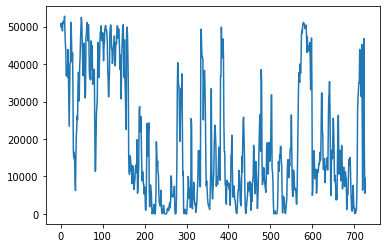

In [201]:
plt.plot(Y)